In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import talib

# 读取数据
df = pd.read_csv('historical_data.csv', parse_dates=['date'], index_col='date')

# ---------------------------------------------------
signals = pd.DataFrame({
    'date': ['2025-01-07 11:38:00-05:00', '2025-01-07 12:59:00-05:00'],  # 示例日期
    'signal': ['buy', 'sell']  # 买入或卖出信号
})
signals['date'] = pd.to_datetime(signals['date'])
signals.set_index('date', inplace=True)

# 将信号合并到主数据框
df['signal'] = signals['signal']

# 提取买卖点的索引和价格
buy_signals = df[df['signal'] == 'buy']
sell_signals = df[df['signal'] == 'sell']
# ---------------------------------------------------
buy_signals_position = [df.index.get_loc(idx) for idx in buy_signals.index]
sell_signals_position = [df.index.get_loc(idx) for idx in sell_signals.index]

In [2]:
df

,open,high,low,close,volume,average,barCount,signal
date,,,,,,,,
2025-01-07 09:30:00-05:00,405.81,406.84,404.80,405.90,625620.0,405.803,1607,NaN
2025-01-07 09:31:00-05:00,405.84,408.80,404.50,407.84,422544.0,406.866,1962,NaN
2025-01-07 09:32:00-05:00,407.94,409.13,406.18,409.01,286966.0,407.875,1418,NaN
2025-01-07 09:33:00-05:00,409.12,409.40,407.20,409.11,258492.0,408.390,1324,NaN
2025-01-07 09:34:00-05:00,409.11,409.69,408.00,409.60,271163.0,409.035,1267,NaN
...,...,...,...,...,...,...,...,...
2025-01-07 15:55:00-05:00,391.69,394.35,391.61,393.42,370192.0,393.638,2007,NaN
2025-01-07 15:56:00-05:00,393.29,393.77,393.24,393.41,173589.0,393.524,1133,NaN
2025-01-07 15:57:00-05:00,393.49,393.92,392.96,393.87,193010.0,393.452,1112,NaN


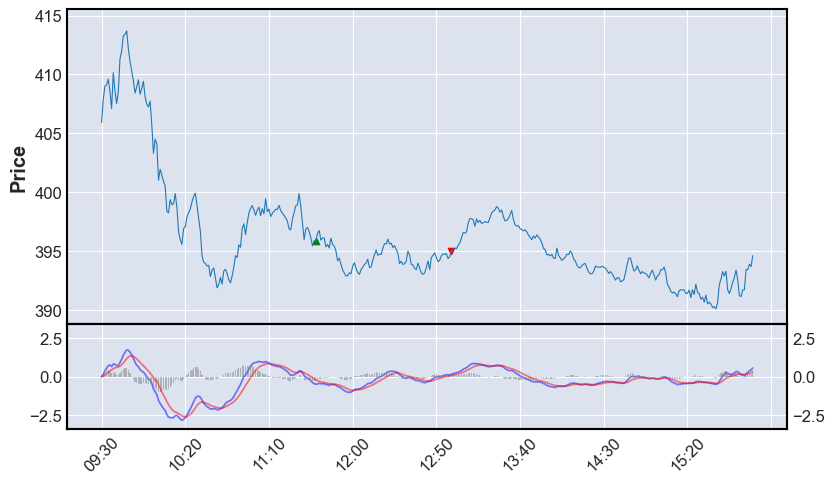

In [3]:
from utils import cal_macd
# 使用TA-Lib计算MACD
df['DIF'], df['DEA'], df['MACD'] = cal_macd(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

fig, axes = mpf.plot(df, type='line', ylabel='Price', 
         addplot=[
             mpf.make_addplot(df['DIF'], panel=1, color='b', alpha=0.5),
             mpf.make_addplot(df['DEA'], panel=1, color='r', alpha=0.5),
             mpf.make_addplot(df['MACD'], panel=1, color='grey', type='bar', width=0.7, alpha=0.5)
         ],
         panel_ratios=(3, 1),  # 设置主图和副图的比例
         volume=False,         # 不显示成交量
         figsize=(10, 6),
         returnfig=True)       # 返回figure和axes对象


# 在主图上标注买卖点
ax_main = axes[0]  # 主图的Axes对象
ax_main.scatter(buy_signals_position, buy_signals['close'], label='Buy', color='green', marker='^', s=20)
ax_main.scatter(sell_signals_position, sell_signals['close'], label='Sell', color='red', marker='v', s=20)

macd_range = max(abs(df['DIF'].min()), abs(df['DIF'].max())) * 1.2
macd_ylim = (-1 * macd_range, macd_range)
for panel_id in range(1, 4):
    axes[panel_id].set_ylim(macd_ylim)

# 显示图像
plt.show()